# Simple Fourier 

In this notebook, I want to try and explain Fourier analysis based on Chapter 10 of Ladefoged's *Elements of Acoustic Phonetics*.

The __[formal definition](https://en.wikipedia.org/wiki/Fourier_analysis)__ of Fourier Analysis includes complex numbers and Euler's formula. That definition applies to the analysis of both real and complex signals. When the signals are real (which is the case for speech signals) the definition can be significantly simplified.

## Discrete-time Signals

Let me casually define a *discrete-time signal* as a list of numbers $x(n)$ defined as a function of a sequence of indices $n=0, 1, 2, 3, \ldots, N-1$. For example, the following code will print the values a signal with $N=10$ and $x(n) = 100+ (n-10)^2$.

In [39]:
for n in range(10):
    x = 100 + (n-10)**2
    print("n =", n ,", x[n] =",x)

n = 0 , x[n] = 200
n = 1 , x[n] = 181
n = 2 , x[n] = 164
n = 3 , x[n] = 149
n = 4 , x[n] = 136
n = 5 , x[n] = 125
n = 6 , x[n] = 116
n = 7 , x[n] = 109
n = 8 , x[n] = 104
n = 9 , x[n] = 101


I can also plot $x$ as a function of $n$, if I am careful to store the values of $n$ and $x$ in *lists*, or *arrays*.  

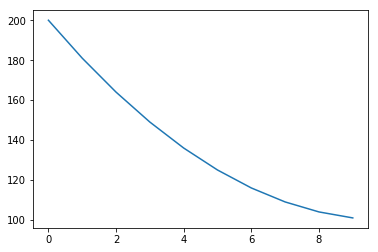

In [43]:
import matplotlib.pyplot as plt

n = [];
x = [];

for i in range(10):
    n.append(i);
    x.append(100 + (i-10)**2)
    
plt.plot(n,x)
plt.show()

I can think of the values $n$ as corresponding to points in time. In particular, the time difference between two time points is $\Delta t = 1/F_s$ where $F_s$ is the *sampling rate* of the signal, which is measured in herz(Hz) or cycles/sec (how many cycles do I have in one second?).

# Sinusoids

Sinusoids are sine and cosine signals. Let me define a sine signal of frequency $f$ and amplitude $A$ as $x_{sin}(n) = A\sin(2\pi \dfrac{f}{F_s}) n$

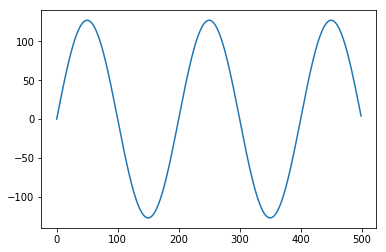

In [46]:
import math

Fs=20000;
f=100;
A=127;

n = [];
x = [];

for i in range(500): # Note that it is arbitrary here how many points I can take
    n.append(i);
    x.append(A*math.sin(2*math.pi*f/Fs*i));
    
plt.plot(n,x)
plt.show()

Same for cosines, say $x_{cos}(n) = A\sin(2\pi \dfrac{f}{F_s}) n$. 

Note what happens if I choose $N=Fs/fs$

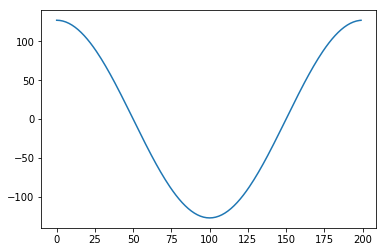

In [45]:
import math

Fs=20000;
f=100;
A=127;

n = [];
x = [];

N=round(Fs/f);

for i in range(N): # Note that it is arbitrary here how many points I can take
    n.append(i);
    x.append(A*math.cos(2*math.pi*f/Fs*i));
    
plt.plot(n,x)
plt.show()

What happens when I choose $N=Fs/f$ is that the $N$ points fill exactly one repetition, or *period*, of the cosine signal (you can check to see for the sine signal).

What this tells me is that the lowest frequency I can *exactly* represent with N points is $f_{low}=Fs/N$.

The highest frequence is derived from the Nyquist theorem and it is $f_{high}=Fs/2$ (why?).